In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import cPickle as pickle
import _pickle as pickle

np.random.seed(20160703)
tf.set_random_seed(20160703)

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
with open('ORENIST.data', 'rb') as file:
#     images, labels = pickle.load(file)
    images, labels = pickle.load(file, encoding='bytes')

In [3]:
def edge_filter():
    filter0 = np.array(
             [[ 2, 1, 0,-1,-2],
             [ 3, 2, 0,-2,-3],
             [ 4, 3, 0,-3,-4],
             [ 3, 2, 0,-2,-3],
             [ 2, 1, 0,-1,-2]]) / 23.0
    filter1 = np.array(
             [[ 2, 3, 4, 3, 2],
             [ 1, 2, 3, 2, 1],
             [ 0, 0, 0, 0, 0],
             [-1,-2,-3,-2,-1],
             [-2,-3,-4,-3,-2]])/23.0
    
    filter_array = np.zeros([5,5,1,2])
    filter_array[:,:,0,0] = filter0
    filter_array[:,:,0,1] = filter1
    
    return tf.constant(filter_array, dtype=tf.float32)

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = edge_filter()
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv-0.2)

h_pool = tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')

In [5]:
h_pool_flat = tf.reshape(h_pool,[-1, 392])

num_units1 = 392
num_units2 = 2

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [6]:
t = tf.placeholder(tf.float32, [None,3])
loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [8]:
i = 0
for _ in range(200):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 10 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:images, t:labels})
        print ('step: %d, loss: %f, accuracy: %f' % (i, loss_val, acc_val))

step: 10, loss: 97.706993, accuracy: 0.788889
step: 20, loss: 96.378815, accuracy: 0.822222
step: 30, loss: 94.918198, accuracy: 0.833333
step: 40, loss: 93.346489, accuracy: 0.911111
step: 50, loss: 91.696594, accuracy: 0.922222
step: 60, loss: 89.997673, accuracy: 0.933333
step: 70, loss: 88.272461, accuracy: 0.966667
step: 80, loss: 86.562065, accuracy: 0.988889
step: 90, loss: 84.892662, accuracy: 1.000000
step: 100, loss: 83.274239, accuracy: 1.000000
step: 110, loss: 81.711754, accuracy: 1.000000
step: 120, loss: 80.205574, accuracy: 1.000000
step: 130, loss: 78.751511, accuracy: 1.000000
step: 140, loss: 77.344208, accuracy: 1.000000
step: 150, loss: 75.978905, accuracy: 1.000000
step: 160, loss: 74.651871, accuracy: 1.000000
step: 170, loss: 73.360237, accuracy: 1.000000
step: 180, loss: 72.101730, accuracy: 1.000000
step: 190, loss: 70.874496, accuracy: 1.000000
step: 200, loss: 69.676971, accuracy: 1.000000


In [9]:
hidden2_vals = sess.run(hidden2, feed_dict={x:images})

z1_vals = [[],[],[]]
z2_vals = [[],[],[]]

for hidden2_val, label in zip(hidden2_vals, labels):
    label_num = np.argmax(label)
    z1_vals[label_num].append(hidden2_val[0])
    z2_vals[label_num].append(hidden2_val[1])


fig = plt.figure(figsize=(5,5))
subplot = fig.add_subplot(1,1,1)
subplot.scatter(z1_vals[0], z2_vals[0], s=200, marker="|")
subplot.scatter(z1_vals[1], z2_vals[1], s=200, marker="_")
subplot.scatter(z1_vals[2], z2_vals[2], s=200, marker="+")


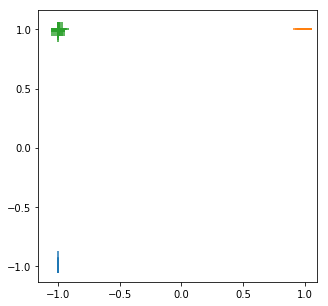

In [10]:
fig